In [ ]:
!pip install tensorflow  opencv-python matplotlib


In [6]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt


In [7]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [12]:
import cv2
import imghdr

In [17]:
data_dir = '/content/sample_data/data'
happy_folder = os.path.join(data_dir, 'happy')
sad_folder = os.path.join(data_dir, 'sad')

In [ ]:
# Iterate through the files in the folder
for file_name in os.listdir(happy_folder):
    file_path = os.path.join(happy_folder, file_name)

    # Check if it's a file and its size is less than 9 KB
    if os.path.isfile(file_path) and os.path.getsize(file_path) < 9 * 1024:
        os.remove(file_path)  # Remove the file
        print(f"Removed: {file_path}")

print("Cleanup completed!")

In [ ]:
# Iterate through the files in the folder
for file_name in os.listdir(sad_folder):
    file_path = os.path.join(sad_folder, file_name)

    # Check if it's a file and its size is less than 9 KB
    if os.path.isfile(file_path) and os.path.getsize(file_path) < 9 * 1024:
        os.remove(file_path)  # Remove the file
        print(f"Removed: {file_path}")

print("Cleanup completed!")

In [20]:
image_exts=['jpeg','jpg','bmp','png']
image_exts[1]

'jpg'

In [ ]:
for image_class in os.listdir(data_dir):
  # print(image_class)
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      # os.remove(image_path)

In [23]:
img=cv2.imread(os.path.join(data_dir,'happy','25115.jpg'))
print(img.shape)

(418, 800, 3)


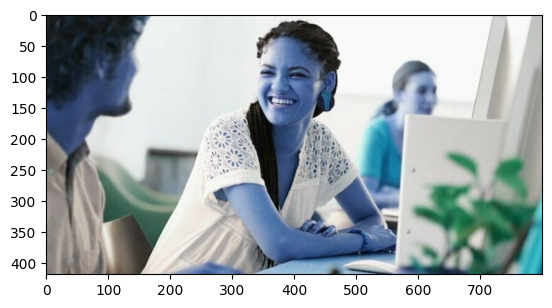

In [24]:
plt.imshow(img)

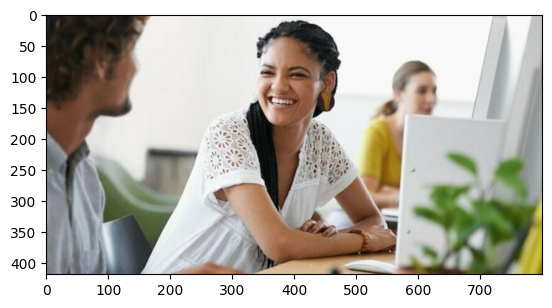

In [25]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
tf.data.Dataset??

In [26]:
import numpy as np
from matplotlib import pyplot as plt

In [27]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 209 files belonging to 2 classes.


In [28]:
data_iterator=data.as_numpy_iterator()

In [33]:
batch=data_iterator.next()

In [30]:
batch[0].shape

(32, 256, 256, 3)

In [34]:
batch[1]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int32)

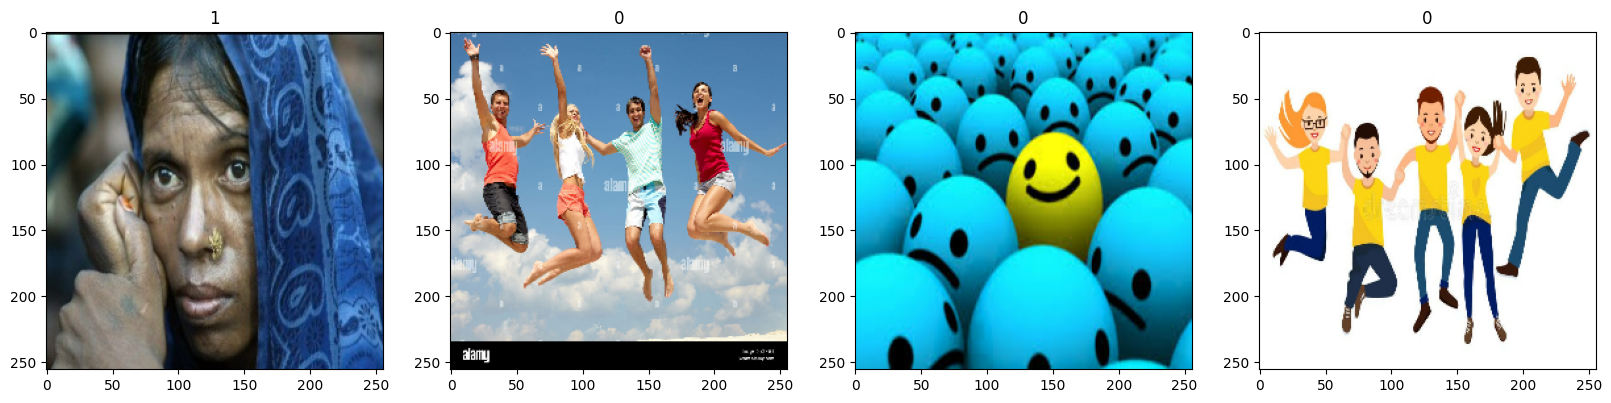

In [35]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Preprocessing


In [36]:
scaled = batch[0] / 255

In [37]:
print(scaled.min())
print(scaled.max())

0.0
1.0


In [38]:
data = data.map(lambda x,y: (x/255, y))

In [39]:
scaled_iterator=data.as_numpy_iterator()

In [40]:
batch=scaled_iterator.next()

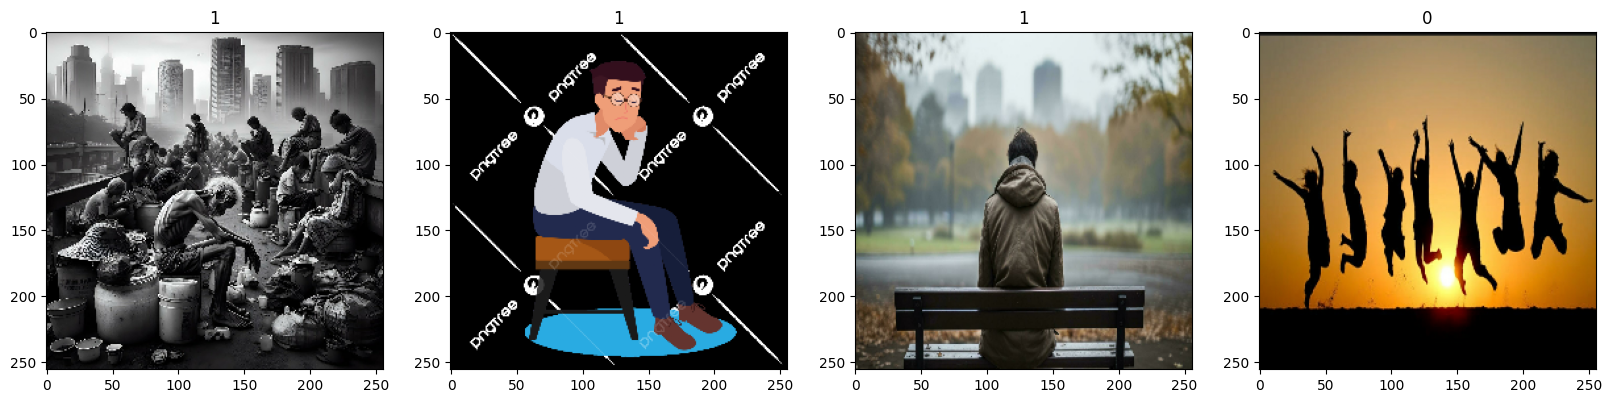

In [41]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [42]:
batch[0].min()

0.0

In [43]:
len(data)

7

In [46]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2) + 1
test_size=int(len(data)*.1) + 1

In [52]:
train_size+val_size+test_size

7

In [53]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [54]:
len(test)

1

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [56]:
model=Sequential()


In [57]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [60]:
logdir='/content/sample_data/logs'

In [61]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [62]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.4688 - loss: 2.1363 - val_accuracy: 0.3125 - val_loss: 1.1060
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4448 - loss: 0.8375 - val_accuracy: 0.6094 - val_loss: 0.6086
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6656 - loss: 0.5879 - val_accuracy: 0.7188 - val_loss: 0.5193
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7198 - loss: 0.5209 - val_accuracy: 0.6094 - val_loss: 0.6257
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7188 - loss: 0.5456 - val_accuracy: 0.7188 - val_loss: 0.5062
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7750 - loss: 0.4481 - val_accuracy: 0.7344 - val_loss: 0.4722
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.8010 - loss: 0.4577 - val_accuracy: 0.8438 - val_loss: 0.4711
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.8635 - loss: 0.3738 - val_accuracy: 0.7969 - val_loss: 0.4225
Epoch 9/

In [63]:
hist.history

{'accuracy': [0.4765625,
  0.5078125,
  0.6640625,
  0.671875,
  0.765625,
  0.7734375,
  0.828125,
  0.890625,
  0.875,
  0.875,
  0.921875,
  0.9609375,
  0.9140625,
  0.9375,
  0.9765625,
  0.9609375,
  0.9765625,
  0.9765625,
  0.9609375,
  1.0],
 'loss': [2.242231607437134,
  0.7458721399307251,
  0.585784912109375,
  0.5952948927879333,
  0.5112561583518982,
  0.4459133744239807,
  0.44616562128067017,
  0.3391585350036621,
  0.3001781105995178,
  0.31580880284309387,
  0.22773534059524536,
  0.14081412553787231,
  0.23825445771217346,
  0.14192861318588257,
  0.10172414779663086,
  0.11336982995271683,
  0.07171700894832611,
  0.10577916353940964,
  0.07821270823478699,
  0.05812942236661911],
 'val_accuracy': [0.3125,
  0.609375,
  0.71875,
  0.609375,
  0.71875,
  0.734375,
  0.84375,
  0.796875,
  0.9375,
  0.859375,
  0.90625,
  0.875,
  0.96875,
  0.984375,
  0.984375,
  0.984375,
  1.0,
  0.953125,
  1.0,
  0.984375],
 'val_loss': [1.1059575080871582,
  0.6086442470550537,

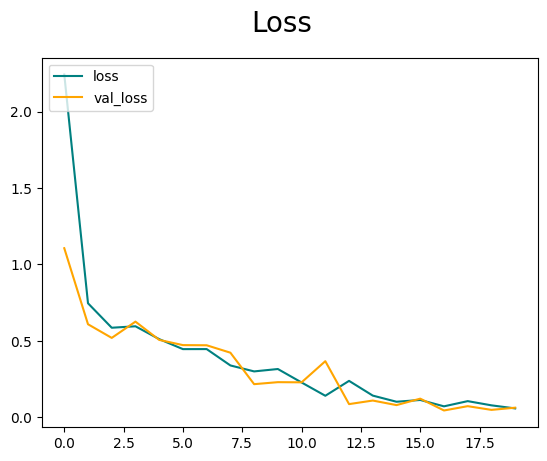

In [64]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

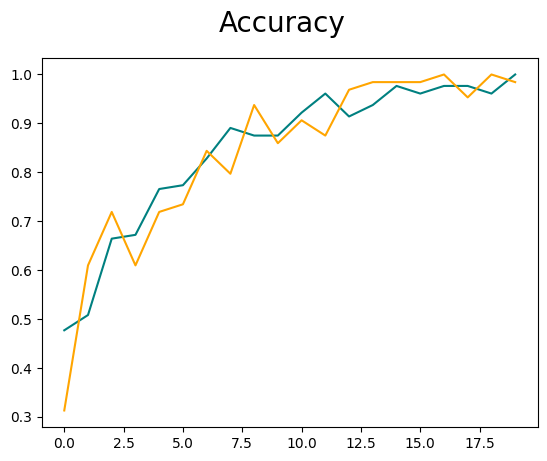

In [65]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.show()

In [66]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [67]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [68]:
for batch in test.as_numpy_iterator():
  x, y=batch
  yhat=model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


In [70]:
print(pre.result().numpy(),re.result().numpy(),acc.result().numpy())

1.0 0.85714287 0.9411765


Test

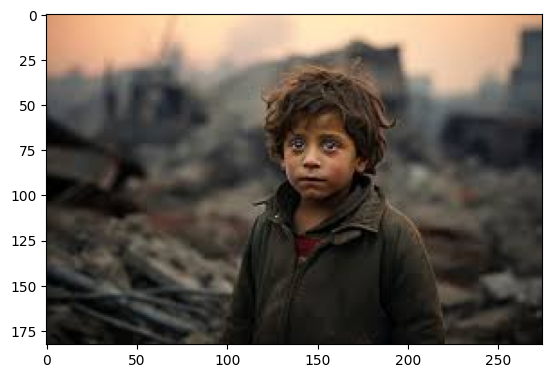

In [86]:
img = cv2.imread('/content/sample_data/test/sad_test.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


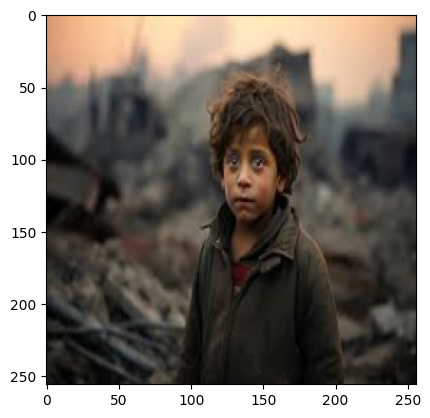

In [87]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [88]:
np.expand_dims(resize/255, 0).shape

(1, 256, 256, 3)

In [91]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


array([[0.96004236]], dtype=float32)

In [92]:
if yhat < 0.5:
  print(f'Predicted class is Happy')
else:
  print(f'Predicted class is Sad')

Predicted class is Sad


Save the model

In [93]:
from tensorflow.keras.models import load_model

In [94]:
model.save(os.path.join('/content/sample_data/model','imageclassifier.h5'))

In [95]:
new_model=load_model(os.path.join('/content/sample_data/model','imageclassifier.h5'))

In [96]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([[0.96004236]], dtype=float32)